# Notebook following meeting on Wednesday 28 November

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set_palette('colorblind')
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('axes',labelsize=20) 
import os
__outdir__ = os.path.expanduser('~')+'/PhD/Gaia_Project/Output/'
__datdir__ = os.path.expanduser('~')+'/PhD/Gaia_Project/data/KepxDR2/'

In [2]:
df = pd.read_csv('/home/oliver/PhD/Gaia_Project/data/KepxDR2/rcxyu18.csv')

## Check the proper spherical frame separations $\theta$ are identical to our Euclidian form

In [3]:
def theta_euc(ra, dec):
    thetaij = np.sqrt(np.subtract.outer(ra, ra)**2 + np.subtract.outer(dec, dec)**2)
    return thetaij
def theta_halley(ra, dec):
    dr = np.deg2rad(dec)
    thetaij = np.sqrt((np.subtract.outer(ra, ra)*np.cos(0.5*np.add.outer(dr, dr)))**2 + np.subtract.outer(dec, dec)**2)
    return thetaij

In [4]:
t1 = theta_euc(df.ra.values, df.dec.values)
t2 = theta_halley(df.ra.values, df.dec.values)

In [5]:
f1 = np.tril(t1).flatten()
f1 = f1[np.where(f1 != 0.0)]
f2 = np.tril(t2).flatten()
f2 = f2[np.where(f2 != 0.0)]

/usr/local/lib/python2.7/dist-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'Angular Separation (deg)')

/home/oliver/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


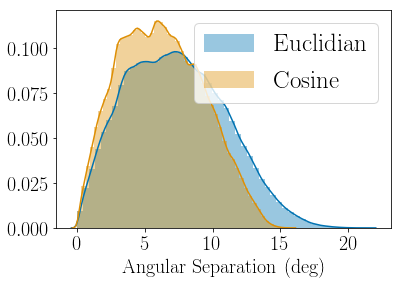

In [6]:
sns.distplot(f1, label='Euclidian')
sns.distplot(f2, label='Cosine')
plt.legend(fontsize=25)
plt.xlabel('Angular Separation (deg)')

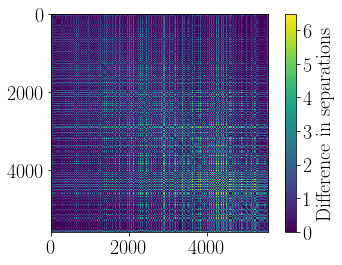

In [7]:
plt.imshow(t1 - t2)
plt.colorbar(label='Difference in separations')
plt.show()

**Conclusion**: I need to fix the kernel in my code!

## Monte Carlo the uncertainties on our $f_{\Delta\nu}$ values

In [8]:
import sys
sys.path.append(os.path.expanduser('~')+'/PhD/Hacks_and_Mocks/asfgrid/')
import asfgrid

def get_fdnu(teff, logz, dnu, numax):
    asf = asfgrid.Seism()
    evstate = np.ones(len(teff))*2

    mass, radius = asf.get_mass_radius(evstate, logz, teff, dnu, numax)
    logg = asf.mr2logg(mass, radius)
    fdnu = asf._get_fdnu(evstate, logz, teff, mass, logg, fill_value='nearest')

    return fdnu

In [9]:
from sklearn.utils import shuffle
sdf = shuffle(df, random_state=24601).reset_index()

In [31]:
from tqdm import tqdm
from astropy import stats
npts = 5000
fdnufracs = []
fdnumads = []
fdnuvals = []
for idx in tqdm(range(1000)):
    teff = np.random.randn(npts)*sdf.Teff_err.values[idx] + sdf.Teff.values[idx]
    logz = np.ones(npts) * np.log10(sdf.Z.values[idx])
    dnu = np.ones(npts) * sdf.dnu.values[idx]
    numax = np.ones(npts) * sdf.numax.values[idx]

    fdnus = get_fdnu(teff, logz, dnu, numax)
#     print('\nMedian :{}'.format(np.median(fdnus)))
#     print('StdDev :{}'.format(np.std(fdnus)))
    fdnuvals.append(np.median(fdnus))
    fdnumads.append(stats.median_absolute_deviation(fdnus))
    fdnufracs.append(stats.median_absolute_deviation(fdnus)/np.median(fdnus)*100.)
#     print('Fractional Sig : {}'.format(fdnufracs[idx]))
#     sns.distplot(fdnus)


  0%|          | 4/1000 [00:07<29:20,  1.77s/it]
Exception in thread Thread-5:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/usr/local/lib/python2.7/dist-packages/tqdm/_monitor.py", line 63, in run
    for instance in self.tqdm_cls._instances:
  File "/usr/lib/python2.7/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration


  1%|          | 9/1000 [00:17<32:01,  1.94s/it]

('outside interp range', 5000, ' out of ', 5000)



  1%|          | 10/1000 [00:21<35:18,  2.14s/it]

('outside interp range', 5000, ' out of ', 5000)



  2%|▏         | 16/1000 [00:32<33:43,  2.06s/it]

('outside interp range', 24, ' out of ', 5000)



  2%|▏         | 23/1000 [00:46<32:43,  2.01s/it]

('outside interp range', 4780, ' out of ', 5000)



  3%|▎         | 26/1000 [00:52<32:29,  2.00s/it]

('outside interp range', 3185, ' out of ', 5000)



  3%|▎         | 29/1000 [00:57<32:18,  2.00s/it]

('outside interp range', 17, ' out of ', 5000)



  4%|▍         | 38/1000 [01:15<31:52,  1.99s/it]

('outside interp range', 2, ' out of ', 5000)



  4%|▍         | 40/1000 [01:19<31:38,  1.98s/it]

('outside interp range', 11, ' out of ', 5000)



  4%|▍         | 42/1000 [01:22<31:31,  1.97s/it]

('outside interp range', 5000, ' out of ', 5000)



  4%|▍         | 43/1000 [01:27<32:20,  2.03s/it]

('outside interp range', 5000, ' out of ', 5000)



  6%|▌         | 57/1000 [01:54<31:27,  2.00s/it]

('outside interp range', 5000, ' out of ', 5000)



  6%|▌         | 58/1000 [01:59<32:19,  2.06s/it]

('outside interp range', 5000, ' out of ', 5000)



  6%|▌         | 60/1000 [02:03<32:14,  2.06s/it]

('outside interp range', 3320, ' out of ', 5000)



  7%|▋         | 71/1000 [02:24<31:29,  2.03s/it]

('outside interp range', 7, ' out of ', 5000)



 10%|▉         | 95/1000 [03:08<29:56,  1.99s/it]

('outside interp range', 231, ' out of ', 5000)



 10%|▉         | 96/1000 [03:10<29:53,  1.98s/it]

('outside interp range', 5000, ' out of ', 5000)



 10%|▉         | 97/1000 [03:12<29:49,  1.98s/it]

('outside interp range', 192, ' out of ', 5000)



 10%|█         | 101/1000 [03:19<29:32,  1.97s/it]

('outside interp range', 778, ' out of ', 5000)



 11%|█         | 111/1000 [03:36<28:53,  1.95s/it]

('outside interp range', 1108, ' out of ', 5000)



 12%|█▏        | 116/1000 [03:45<28:36,  1.94s/it]

('outside interp range', 3, ' out of ', 5000)



 12%|█▏        | 117/1000 [03:47<28:33,  1.94s/it]

('outside interp range', 17, ' out of ', 5000)



 12%|█▏        | 121/1000 [03:54<28:19,  1.93s/it]

('outside interp range', 1020, ' out of ', 5000)



 13%|█▎        | 129/1000 [04:07<27:53,  1.92s/it]

('outside interp range', 5000, ' out of ', 5000)



 13%|█▎        | 134/1000 [04:16<27:38,  1.92s/it]

('outside interp range', 4786, ' out of ', 5000)



 14%|█▎        | 136/1000 [04:20<27:34,  1.92s/it]

('outside interp range', 673, ' out of ', 5000)



 14%|█▍        | 142/1000 [04:31<27:22,  1.91s/it]

('outside interp range', 2709, ' out of ', 5000)



 14%|█▍        | 145/1000 [04:37<27:13,  1.91s/it]

('outside interp range', 384, ' out of ', 5000)



 15%|█▍        | 147/1000 [04:40<27:07,  1.91s/it]

('outside interp range', 76, ' out of ', 5000)



 15%|█▌        | 150/1000 [04:45<26:58,  1.90s/it]

('outside interp range', 3692, ' out of ', 5000)



 16%|█▌        | 157/1000 [04:57<26:39,  1.90s/it]

('outside interp range', 2454, ' out of ', 5000)



 16%|█▌        | 158/1000 [04:59<26:36,  1.90s/it]

('outside interp range', 33, ' out of ', 5000)



 16%|█▌        | 160/1000 [05:03<26:31,  1.90s/it]

('outside interp range', 3, ' out of ', 5000)



 16%|█▌        | 161/1000 [05:05<26:30,  1.90s/it]

('outside interp range', 4959, ' out of ', 5000)



 16%|█▋        | 164/1000 [05:10<26:22,  1.89s/it]

('outside interp range', 3379, ' out of ', 5000)



 17%|█▋        | 174/1000 [05:27<25:54,  1.88s/it]

('outside interp range', 5000, ' out of ', 5000)



 18%|█▊        | 177/1000 [05:32<25:47,  1.88s/it]

('outside interp range', 1, ' out of ', 5000)



 18%|█▊        | 178/1000 [05:34<25:45,  1.88s/it]

('outside interp range', 5, ' out of ', 5000)



 18%|█▊        | 181/1000 [05:39<25:38,  1.88s/it]

('outside interp range', 1, ' out of ', 5000)



 18%|█▊        | 183/1000 [05:43<25:34,  1.88s/it]

('outside interp range', 680, ' out of ', 5000)



 19%|█▉        | 191/1000 [05:58<25:16,  1.87s/it]

('outside interp range', 185, ' out of ', 5000)



 19%|█▉        | 192/1000 [06:00<25:15,  1.88s/it]

('outside interp range', 4735, ' out of ', 5000)
('outside interp range', 5000, ' out of ', 5000)



 19%|█▉        | 193/1000 [06:04<25:22,  1.89s/it]

('outside interp range', 5000, ' out of ', 5000)



 20%|█▉        | 198/1000 [06:12<25:10,  1.88s/it]

('outside interp range', 31, ' out of ', 5000)



 20%|█▉        | 199/1000 [06:14<25:09,  1.88s/it]

('outside interp range', 19, ' out of ', 5000)



 20%|██        | 202/1000 [06:20<25:04,  1.89s/it]

('outside interp range', 845, ' out of ', 5000)



 20%|██        | 205/1000 [06:26<25:00,  1.89s/it]

('outside interp range', 5000, ' out of ', 5000)



 21%|██        | 206/1000 [06:28<24:58,  1.89s/it]

('outside interp range', 4, ' out of ', 5000)



 22%|██▏       | 215/1000 [06:44<24:35,  1.88s/it]

('outside interp range', 5000, ' out of ', 5000)



 22%|██▏       | 216/1000 [06:47<24:40,  1.89s/it]

('outside interp range', 5000, ' out of ', 5000)



 23%|██▎       | 228/1000 [07:09<24:14,  1.88s/it]

('outside interp range', 4826, ' out of ', 5000)



 24%|██▍       | 240/1000 [07:30<23:45,  1.88s/it]

('outside interp range', 36, ' out of ', 5000)



 24%|██▍       | 241/1000 [07:31<23:43,  1.88s/it]

('outside interp range', 329, ' out of ', 5000)



 25%|██▍       | 249/1000 [07:45<23:24,  1.87s/it]

('outside interp range', 5000, ' out of ', 5000)



 25%|██▌       | 250/1000 [07:50<23:30,  1.88s/it]

('outside interp range', 5000, ' out of ', 5000)



 25%|██▌       | 251/1000 [07:52<23:28,  1.88s/it]

('outside interp range', 665, ' out of ', 5000)



 26%|██▋       | 263/1000 [08:13<23:02,  1.88s/it]

('outside interp range', 5000, ' out of ', 5000)



 26%|██▋       | 264/1000 [08:17<23:05,  1.88s/it]

('outside interp range', 5000, ' out of ', 5000)



 27%|██▋       | 266/1000 [08:20<23:01,  1.88s/it]

('outside interp range', 4, ' out of ', 5000)



 27%|██▋       | 267/1000 [08:22<22:59,  1.88s/it]

('outside interp range', 282, ' out of ', 5000)



 27%|██▋       | 269/1000 [08:25<22:54,  1.88s/it]

('outside interp range', 1, ' out of ', 5000)



 28%|██▊       | 276/1000 [08:38<22:40,  1.88s/it]

('outside interp range', 44, ' out of ', 5000)



 28%|██▊       | 278/1000 [08:42<22:36,  1.88s/it]

('outside interp range', 5000, ' out of ', 5000)



 28%|██▊       | 281/1000 [08:47<22:29,  1.88s/it]

('outside interp range', 5000, ' out of ', 5000)



 28%|██▊       | 283/1000 [08:50<22:25,  1.88s/it]

('outside interp range', 1, ' out of ', 5000)



 29%|██▉       | 288/1000 [08:59<22:14,  1.87s/it]

('outside interp range', 2625, ' out of ', 5000)



 29%|██▉       | 292/1000 [09:07<22:07,  1.88s/it]

('outside interp range', 1, ' out of ', 5000)



 29%|██▉       | 293/1000 [09:09<22:05,  1.88s/it]

('outside interp range', 3643, ' out of ', 5000)



 29%|██▉       | 294/1000 [09:11<22:03,  1.88s/it]

('outside interp range', 4991, ' out of ', 5000)



 30%|██▉       | 296/1000 [09:14<21:59,  1.87s/it]

('outside interp range', 7, ' out of ', 5000)



 30%|███       | 302/1000 [09:25<21:46,  1.87s/it]

('outside interp range', 197, ' out of ', 5000)



 32%|███▏      | 318/1000 [09:52<21:10,  1.86s/it]

('outside interp range', 5000, ' out of ', 5000)



 32%|███▏      | 320/1000 [09:55<21:06,  1.86s/it]

('outside interp range', 73, ' out of ', 5000)



 32%|███▏      | 322/1000 [09:59<21:02,  1.86s/it]

('outside interp range', 2, ' out of ', 5000)



 32%|███▏      | 324/1000 [10:03<20:58,  1.86s/it]

('outside interp range', 1, ' out of ', 5000)



 33%|███▎      | 326/1000 [10:06<20:54,  1.86s/it]

('outside interp range', 98, ' out of ', 5000)



 33%|███▎      | 331/1000 [10:15<20:44,  1.86s/it]

('outside interp range', 4398, ' out of ', 5000)



 34%|███▍      | 343/1000 [10:35<20:17,  1.85s/it]

('outside interp range', 2, ' out of ', 5000)



 35%|███▍      | 348/1000 [10:44<20:07,  1.85s/it]

('outside interp range', 3245, ' out of ', 5000)



 35%|███▍      | 349/1000 [10:46<20:05,  1.85s/it]

('outside interp range', 2428, ' out of ', 5000)



 36%|███▌      | 360/1000 [11:04<19:41,  1.85s/it]

('outside interp range', 705, ' out of ', 5000)



 36%|███▋      | 364/1000 [11:11<19:33,  1.84s/it]

('outside interp range', 1, ' out of ', 5000)



 37%|███▋      | 369/1000 [11:19<19:22,  1.84s/it]

('outside interp range', 5000, ' out of ', 5000)



 37%|███▋      | 370/1000 [11:23<19:23,  1.85s/it]

('outside interp range', 5000, ' out of ', 5000)



 37%|███▋      | 371/1000 [11:25<19:21,  1.85s/it]

('outside interp range', 246, ' out of ', 5000)



 37%|███▋      | 372/1000 [11:26<19:19,  1.85s/it]

('outside interp range', 3567, ' out of ', 5000)



 37%|███▋      | 374/1000 [11:30<19:15,  1.85s/it]

('outside interp range', 4447, ' out of ', 5000)



 38%|███▊      | 375/1000 [11:32<19:13,  1.85s/it]

('outside interp range', 40, ' out of ', 5000)



 38%|███▊      | 384/1000 [11:47<18:54,  1.84s/it]

('outside interp range', 14, ' out of ', 5000)



 38%|███▊      | 385/1000 [11:49<18:52,  1.84s/it]

('outside interp range', 3, ' out of ', 5000)



 39%|███▉      | 388/1000 [11:54<18:46,  1.84s/it]

('outside interp range', 74, ' out of ', 5000)



 39%|███▉      | 390/1000 [11:57<18:42,  1.84s/it]

('outside interp range', 105, ' out of ', 5000)



 40%|███▉      | 396/1000 [12:07<18:30,  1.84s/it]

('outside interp range', 4950, ' out of ', 5000)



 42%|████▏     | 416/1000 [12:41<17:49,  1.83s/it]

('outside interp range', 1, ' out of ', 5000)



 43%|████▎     | 426/1000 [12:58<17:28,  1.83s/it]

('outside interp range', 4671, ' out of ', 5000)



 43%|████▎     | 433/1000 [13:10<17:14,  1.83s/it]

('outside interp range', 145, ' out of ', 5000)



 44%|████▎     | 435/1000 [13:13<17:10,  1.82s/it]

('outside interp range', 1, ' out of ', 5000)



 44%|████▍     | 445/1000 [13:30<16:51,  1.82s/it]

('outside interp range', 123, ' out of ', 5000)



 45%|████▌     | 450/1000 [13:39<16:41,  1.82s/it]

('outside interp range', 24, ' out of ', 5000)



 46%|████▌     | 455/1000 [13:47<16:31,  1.82s/it]

('outside interp range', 5000, ' out of ', 5000)



 46%|████▌     | 456/1000 [13:51<16:31,  1.82s/it]

('outside interp range', 5000, ' out of ', 5000)



 46%|████▌     | 457/1000 [13:52<16:29,  1.82s/it]

('outside interp range', 4745, ' out of ', 5000)



 47%|████▋     | 469/1000 [14:13<16:05,  1.82s/it]

('outside interp range', 4998, ' out of ', 5000)



 48%|████▊     | 481/1000 [14:33<15:42,  1.82s/it]

('outside interp range', 2480, ' out of ', 5000)



 49%|████▉     | 493/1000 [14:53<15:19,  1.81s/it]

('outside interp range', 3, ' out of ', 5000)



 50%|█████     | 500/1000 [15:05<15:05,  1.81s/it]

('outside interp range', 4206, ' out of ', 5000)



 51%|█████     | 507/1000 [15:17<14:51,  1.81s/it]

('outside interp range', 79, ' out of ', 5000)



 51%|█████     | 512/1000 [15:25<14:42,  1.81s/it]

('outside interp range', 1563, ' out of ', 5000)



 53%|█████▎    | 526/1000 [15:49<14:15,  1.80s/it]

('outside interp range', 1, ' out of ', 5000)



 53%|█████▎    | 528/1000 [15:52<14:11,  1.80s/it]

('outside interp range', 1, ' out of ', 5000)



 54%|█████▎    | 537/1000 [16:08<13:54,  1.80s/it]

('outside interp range', 228, ' out of ', 5000)



 54%|█████▍    | 542/1000 [16:16<13:45,  1.80s/it]

('outside interp range', 377, ' out of ', 5000)



 55%|█████▍    | 549/1000 [16:28<13:31,  1.80s/it]

('outside interp range', 1, ' out of ', 5000)



 55%|█████▌    | 550/1000 [16:30<13:30,  1.80s/it]

('outside interp range', 4, ' out of ', 5000)



 55%|█████▌    | 554/1000 [16:36<13:22,  1.80s/it]

('outside interp range', 1, ' out of ', 5000)



 56%|█████▌    | 555/1000 [16:38<13:20,  1.80s/it]

('outside interp range', 1, ' out of ', 5000)



 56%|█████▌    | 561/1000 [16:48<13:09,  1.80s/it]

('outside interp range', 4334, ' out of ', 5000)



 57%|█████▋    | 569/1000 [17:02<12:54,  1.80s/it]

('outside interp range', 918, ' out of ', 5000)



 57%|█████▋    | 573/1000 [17:09<12:46,  1.80s/it]

('outside interp range', 780, ' out of ', 5000)



 57%|█████▊    | 575/1000 [17:12<12:43,  1.80s/it]

('outside interp range', 1805, ' out of ', 5000)



 59%|█████▉    | 590/1000 [17:37<12:15,  1.79s/it]

('outside interp range', 5000, ' out of ', 5000)



 59%|█████▉    | 591/1000 [17:41<12:14,  1.80s/it]

('outside interp range', 5000, ' out of ', 5000)



 60%|█████▉    | 595/1000 [17:48<12:07,  1.80s/it]

('outside interp range', 1150, ' out of ', 5000)



 61%|██████    | 606/1000 [18:06<11:46,  1.79s/it]

('outside interp range', 15, ' out of ', 5000)



 62%|██████▏   | 622/1000 [18:33<11:16,  1.79s/it]

('outside interp range', 5000, ' out of ', 5000)



 62%|██████▏   | 623/1000 [18:36<11:15,  1.79s/it]

('outside interp range', 5000, ' out of ', 5000)



 66%|██████▌   | 656/1000 [19:32<10:14,  1.79s/it]

('outside interp range', 4939, ' out of ', 5000)



 66%|██████▋   | 665/1000 [19:47<09:58,  1.79s/it]

('outside interp range', 3768, ' out of ', 5000)



 67%|██████▋   | 667/1000 [19:51<09:54,  1.79s/it]

('outside interp range', 4738, ' out of ', 5000)



 67%|██████▋   | 668/1000 [19:52<09:52,  1.79s/it]

('outside interp range', 5000, ' out of ', 5000)



 67%|██████▋   | 670/1000 [19:56<09:49,  1.79s/it]

('outside interp range', 4700, ' out of ', 5000)



 67%|██████▋   | 671/1000 [19:57<09:47,  1.79s/it]

('outside interp range', 1, ' out of ', 5000)



 68%|██████▊   | 679/1000 [20:11<09:32,  1.78s/it]

('outside interp range', 92, ' out of ', 5000)



 70%|██████▉   | 697/1000 [20:41<08:59,  1.78s/it]

('outside interp range', 447, ' out of ', 5000)



 70%|██████▉   | 698/1000 [20:43<08:58,  1.78s/it]

('outside interp range', 5000, ' out of ', 5000)



 70%|███████   | 702/1000 [20:50<08:50,  1.78s/it]

('outside interp range', 2, ' out of ', 5000)



 71%|███████   | 709/1000 [21:02<08:38,  1.78s/it]

('outside interp range', 2480, ' out of ', 5000)



 71%|███████▏  | 713/1000 [21:09<08:30,  1.78s/it]

('outside interp range', 1, ' out of ', 5000)



 72%|███████▏  | 719/1000 [21:19<08:19,  1.78s/it]

('outside interp range', 186, ' out of ', 5000)



 72%|███████▏  | 720/1000 [21:20<08:18,  1.78s/it]

('outside interp range', 1730, ' out of ', 5000)



 73%|███████▎  | 732/1000 [21:41<07:56,  1.78s/it]

('outside interp range', 79, ' out of ', 5000)



 74%|███████▎  | 735/1000 [21:46<07:50,  1.78s/it]

('outside interp range', 2, ' out of ', 5000)



 74%|███████▎  | 737/1000 [21:49<07:47,  1.78s/it]

('outside interp range', 4998, ' out of ', 5000)



 75%|███████▍  | 746/1000 [22:04<07:31,  1.78s/it]

('outside interp range', 282, ' out of ', 5000)



 75%|███████▌  | 752/1000 [22:14<07:20,  1.78s/it]

('outside interp range', 130, ' out of ', 5000)



 76%|███████▌  | 759/1000 [22:26<07:07,  1.77s/it]

('outside interp range', 75, ' out of ', 5000)



 78%|███████▊  | 785/1000 [23:10<06:20,  1.77s/it]

('outside interp range', 4837, ' out of ', 5000)



 79%|███████▉  | 794/1000 [23:25<06:04,  1.77s/it]

('outside interp range', 2895, ' out of ', 5000)



 80%|███████▉  | 797/1000 [23:30<05:59,  1.77s/it]

('outside interp range', 4640, ' out of ', 5000)



 80%|████████  | 800/1000 [23:35<05:53,  1.77s/it]

('outside interp range', 595, ' out of ', 5000)



 80%|████████  | 802/1000 [23:39<05:50,  1.77s/it]

('outside interp range', 38, ' out of ', 5000)



 80%|████████  | 803/1000 [23:41<05:48,  1.77s/it]

('outside interp range', 186, ' out of ', 5000)



 80%|████████  | 805/1000 [23:44<05:45,  1.77s/it]

('outside interp range', 5000, ' out of ', 5000)



 82%|████████▏ | 817/1000 [24:04<05:23,  1.77s/it]

('outside interp range', 63, ' out of ', 5000)



 82%|████████▏ | 823/1000 [24:15<05:12,  1.77s/it]

('outside interp range', 5000, ' out of ', 5000)



 84%|████████▍ | 842/1000 [24:47<04:39,  1.77s/it]

('outside interp range', 5000, ' out of ', 5000)



 85%|████████▍ | 849/1000 [24:58<04:26,  1.77s/it]

('outside interp range', 5000, ' out of ', 5000)



 85%|████████▌ | 850/1000 [25:02<04:25,  1.77s/it]

('outside interp range', 5000, ' out of ', 5000)



 86%|████████▌ | 856/1000 [25:12<04:14,  1.77s/it]

('outside interp range', 4897, ' out of ', 5000)



 86%|████████▋ | 865/1000 [25:27<03:58,  1.77s/it]

('outside interp range', 2, ' out of ', 5000)



 87%|████████▋ | 867/1000 [25:31<03:54,  1.77s/it]

('outside interp range', 9, ' out of ', 5000)



 87%|████████▋ | 869/1000 [25:34<03:51,  1.77s/it]

('outside interp range', 380, ' out of ', 5000)



 87%|████████▋ | 870/1000 [25:36<03:49,  1.77s/it]

('outside interp range', 4877, ' out of ', 5000)



 88%|████████▊ | 882/1000 [25:56<03:28,  1.76s/it]

('outside interp range', 99, ' out of ', 5000)



 89%|████████▊ | 887/1000 [26:04<03:19,  1.76s/it]

('outside interp range', 4904, ' out of ', 5000)



 90%|█████████ | 902/1000 [26:29<02:52,  1.76s/it]

('outside interp range', 22, ' out of ', 5000)



 90%|█████████ | 904/1000 [26:33<02:49,  1.76s/it]

('outside interp range', 1, ' out of ', 5000)



 90%|█████████ | 905/1000 [26:35<02:47,  1.76s/it]

('outside interp range', 3, ' out of ', 5000)



 91%|█████████ | 906/1000 [26:36<02:45,  1.76s/it]

('outside interp range', 228, ' out of ', 5000)



 91%|█████████ | 909/1000 [26:42<02:40,  1.76s/it]

('outside interp range', 14, ' out of ', 5000)



 91%|█████████▏| 913/1000 [26:48<02:33,  1.76s/it]

('outside interp range', 5000, ' out of ', 5000)



 93%|█████████▎| 927/1000 [27:12<02:08,  1.76s/it]

('outside interp range', 5000, ' out of ', 5000)



 93%|█████████▎| 929/1000 [27:15<02:05,  1.76s/it]

('outside interp range', 3644, ' out of ', 5000)



 94%|█████████▎| 937/1000 [27:29<01:50,  1.76s/it]

('outside interp range', 3, ' out of ', 5000)



 94%|█████████▍| 943/1000 [27:39<01:40,  1.76s/it]

('outside interp range', 1, ' out of ', 5000)



 95%|█████████▍| 946/1000 [27:44<01:35,  1.76s/it]

('outside interp range', 1684, ' out of ', 5000)



 95%|█████████▍| 948/1000 [27:48<01:31,  1.76s/it]

('outside interp range', 25, ' out of ', 5000)



 97%|█████████▋| 969/1000 [28:23<00:54,  1.76s/it]

('outside interp range', 138, ' out of ', 5000)



 98%|█████████▊| 977/1000 [28:36<00:40,  1.76s/it]

('outside interp range', 3850, ' out of ', 5000)



 98%|█████████▊| 982/1000 [28:45<00:31,  1.76s/it]

('outside interp range', 587, ' out of ', 5000)



 99%|█████████▊| 986/1000 [28:51<00:24,  1.76s/it]

('outside interp range', 5000, ' out of ', 5000)



 99%|█████████▊| 987/1000 [28:55<00:22,  1.76s/it]

('outside interp range', 5000, ' out of ', 5000)



 99%|█████████▉| 992/1000 [29:03<00:14,  1.76s/it]

('outside interp range', 43, ' out of ', 5000)



100%|█████████▉| 998/1000 [29:14<00:03,  1.76s/it]

('outside interp range', 55, ' out of ', 5000)



100%|██████████| 1000/1000 [29:17<00:00,  1.76s/it]


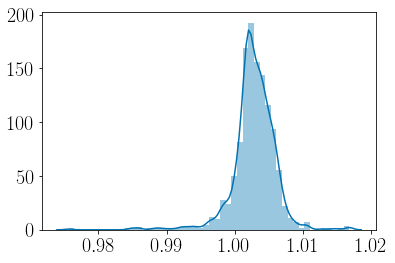

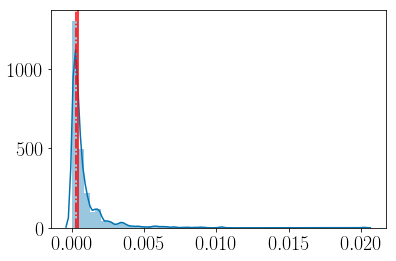

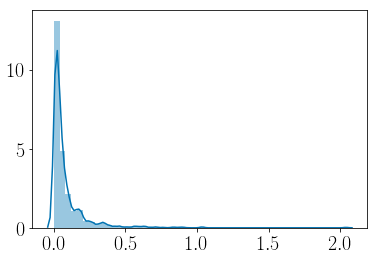

In [39]:
sns.distplot(fdnuvals)
plt.show()
sns.distplot(fdnumads)
plt.axvline(np.median(fdnumads),c='r')
plt.axvline(stats.median_absolute_deviation(fdnumads),c='r', linestyle='-.')
plt.show()
sns.distplot(fdnufracs)
plt.show()

0.0
0.03751108993560349
0.16341424927836334
0.14039119855091928


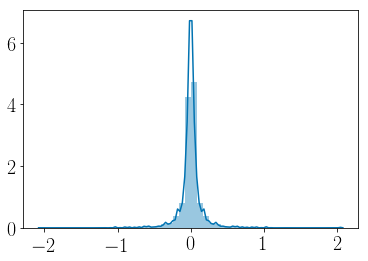

In [44]:
tt = np.zeros(len(fdnufracs)*2)
tt[0:1000] = np.array(fdnufracs)*-1
tt[1000:] = fdnufracs
sns.distplot(tt)
print(np.median(tt))
print(np.median(fdnufracs))
print(np.std(tt))
print(np.std(fdnufracs))

Conclusions: The fractional uncertainties are not small enough to reasonably ignore when implementation is so simple.

Whats more, the monte-carlo'd uncertainties can in some cases cover the systematic uncertainty due to choice of $f_{\Delta\nu}$

### How does this compare to the uncertainty in our results we expect from choice of grids?

...

## Monte Carlo the uncertainties on our Bolometric Corrections

We'll look at 10 or so stars.

In [39]:
import omnitool
import os
import subprocess
__bccodes__ = os.path.expanduser('~')+'/PhD/Hacks_and_Mocks/bolometric-corrections/BCcodes/'

In [40]:
from sklearn.utils import shuffle
sdf = shuffle(df, random_state=24601).reset_index()

In [41]:
npts = 5000
bckfracs = []
bcgfracs = []
stdg = []
stdk = []

for idx in range(1000):
    out = pd.DataFrame()
    out['KICID'] = np.ones(npts) * sdf.KICID[idx]
    out['[Fe/H]'] = np.ones(npts) * sdf['[Fe/H]'][idx]
    out['Teff'] = np.random.randn(npts)*sdf.Teff_err.values[idx] + sdf.Teff.values[idx]
    out['Ebv'] = np.zeros(npts)
    
    sc = omnitool.scalings(np.ones(npts)*sdf.numax[idx], np.ones(npts)*sdf.dnu[idx], out.Teff)
    out['logg'] = sc.get_logg()
    out = out[['KICID','logg','[Fe/H]','Teff','Ebv']][:100]
    out.to_csv(__bccodes__+'input.sample.all',  sep='\t', header=False, index=False,)

    os.chdir(os.path.expanduser('~')+'/PhD/Hacks_and_Mocks/bolometric-corrections/BCcodes/')
    subprocess.call(__bccodes__+"bcall", shell=True)
    os.chdir(os.path.expanduser('~')+'//PhD/Gaia_Project/GAIA/Tests/')    
    
    bcall = pd.read_csv(__bccodes__+'output.file.all', sep='\s+')
    bcall.rename(columns={'ID':'KICID',
                        'BC_1':'BC_J',
                        'BC_2':'BC_H',
                        'BC_3':'BCK',
                        'BC_4':'BCG'}, inplace=True)
    bcall.drop(columns=['BC_J','BC_H','KICID','log(g)','[Fe/H]','Teff','E(B-V)','BC_5'], inplace=True)

    print('\n For the K band:')
    print('\nMedian :{}'.format(np.median(bcall.BCK)))
    print('StdDev :{}'.format(np.std(bcall.BCK)))
    stdk.append(np.std(bcall.BCK))
    bckfracs.append(np.std(bcall.BCK)/np.median(bcall.BCK)*100.)
    print('Fractional Sig : {}'.format(bckfracs[idx]))
#     sns.distplot(bcall.BCK)
#     plt.show()
    print('\n For the G band:')
    print('\nMedian :{}'.format(np.median(bcall.BCG)))
    print('StdDev :{}'.format(np.std(bcall.BCG)))
    stdg.append(np.std(bcall.BCG))
    bcgfracs.append(np.std(bcall.BCG)/np.median(bcall.BCG)*100.)
    print('Fractional Sig : {}'.format(bcgfracs[idx]))
#     sns.distplot(bcall.BCG)    
#     plt.show()


 For the K band:

Median :2.2335
StdDev :0.0390026601657
Fractional Sig : 1.74625745089

 For the G band:

Median :-0.1565
StdDev :0.02539962795
Fractional Sig : -16.2297942173

 For the K band:

Median :2.1725
StdDev :0.0480951920674
Fractional Sig : 2.21381781668

 For the G band:

Median :-0.124
StdDev :0.028244468485
Fractional Sig : -22.7777971653

 For the K band:

Median :2.001
StdDev :0.0538549904837
Fractional Sig : 2.69140382227

 For the G band:

Median :-0.0475
StdDev :0.02254210283
Fractional Sig : -47.4570585896

 For the K band:

Median :2.1685
StdDev :0.0457529660241
Fractional Sig : 2.10989006337

 For the G band:

Median :-0.1175
StdDev :0.0274679012668
Fractional Sig : -23.3769372483

 For the K band:

Median :1.942
StdDev :0.0513764693221
Fractional Sig : 2.64554424933

 For the G band:

Median :-0.037
StdDev :0.0190968583804
Fractional Sig : -51.6131307578

 For the K band:

Median :2.0365
StdDev :0.0477933844794
Fractional Sig : 2.34683940483

 For the G band:

M


 For the K band:

Median :2.061
StdDev :0.0451287314247
Fractional Sig : 2.18965217975

 For the G band:

Median :-0.065
StdDev :0.0223851088896
Fractional Sig : -34.4386290609

 For the K band:

Median :2.1195
StdDev :0.0479054600228
Fractional Sig : 2.26022458235

 For the G band:

Median :-0.097
StdDev :0.0245781915527
Fractional Sig : -25.3383418069

 For the K band:

Median :2.022
StdDev :0.057895920409
Fractional Sig : 2.86329972349

 For the G band:

Median :-0.065
StdDev :0.0256950014594
Fractional Sig : -39.530771476

 For the K band:

Median :2.07
StdDev :0.045156930808
Fractional Sig : 2.18149424193

 For the G band:

Median :-0.079
StdDev :0.0220110404116
Fractional Sig : -27.8620764703

 For the K band:

Median :2.061
StdDev :0.047681546745
Fractional Sig : 2.31351512591

 For the G band:

Median :-0.0755
StdDev :0.022064403459
Fractional Sig : -29.2243754423

 For the K band:

Median :2.021
StdDev :0.0521083064396
Fractional Sig : 2.57834272338

 For the G band:

Median 


 For the K band:

Median :1.9155
StdDev :0.0493728022296
Fractional Sig : 2.57754122838

 For the G band:

Median :-0.04
StdDev :0.0172601593272
Fractional Sig : -43.150398318

 For the K band:

Median :2.102
StdDev :0.0474692268738
Fractional Sig : 2.25828862387

 For the G band:

Median :-0.0845
StdDev :0.0249416338679
Fractional Sig : -29.5167264709

 For the K band:

Median :1.9945
StdDev :0.0556471957964
Fractional Sig : 2.79003237886

 For the G band:

Median :-0.0465
StdDev :0.0235608552476
Fractional Sig : -50.6685059089

 For the K band:

Median :2.056
StdDev :0.0480117433551
Fractional Sig : 2.33520152506

 For the G band:

Median :-0.068
StdDev :0.0223395255097
Fractional Sig : -32.8522433967

 For the K band:

Median :2.141
StdDev :0.0549541954722
Fractional Sig : 2.56675364186

 For the G band:

Median :-0.113
StdDev :0.0300540496439
Fractional Sig : -26.5965041097

 For the K band:

Median :2.134
StdDev :0.0414198249634
Fractional Sig : 1.94094774899

 For the G band:

M

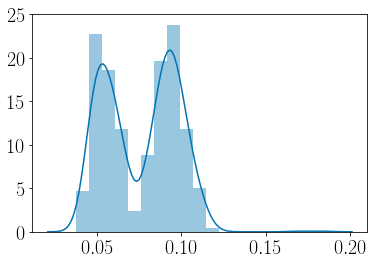

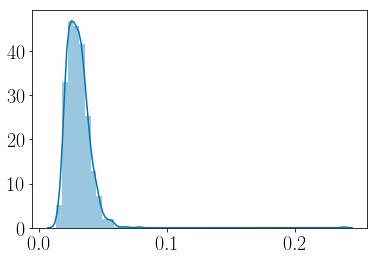

In [65]:
sns.distplot(stdk)
plt.show()
sns.distplot(stdg)
plt.show()

In [72]:
np.median(stdg)

0.02937471446712766

In [67]:
output = pd.DataFrame()
output['stdk'] = stdk
output['stdg'] = stdg
output.to_csv('BC-checks-5000iters-1000stars.csv')

In [25]:
stdk = pd.read_csv('BC-checks-5000iters-1000stars.csv')['stdk']

In [18]:
import matplotlib
matplotlib.rcParams['text.usetex']=False


In [20]:
ft = sdf.Teff_err/sdf.Teff 

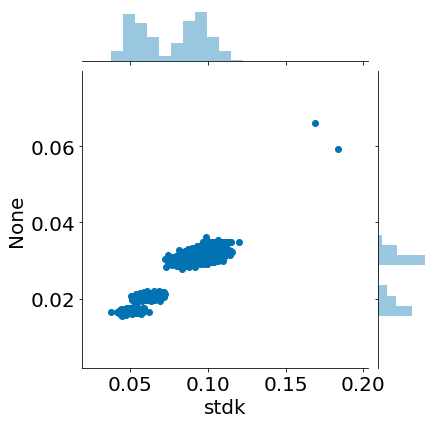

In [21]:
sns.jointplot(stdk, ft[:1000])

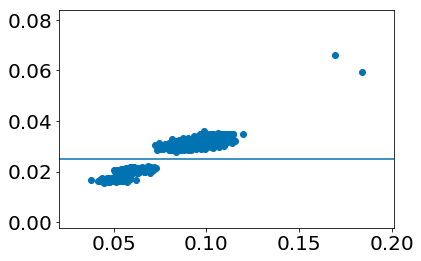

In [22]:
plt.scatter(stdk, ft[:1000])
plt.axhline(0.025)

In [33]:
np.median(stdk[ft[:1000]> 0.025])

0.09353762709949556

In [34]:
np.median(stdk[ft[:1000] < 0.025])

0.05413002482037894